In [2]:
import matplotlib.pyplot as plt
import re

In [3]:
def read_log(file):
    with open(file, 'r') as f:
        lines = f.readlines()
    return lines[4:]

train_losses_log = read_log("train_losses_log.log")
test_losses_log = read_log("test_losses_log.log")
metrics_log = read_log("metrics_log.log")

In [4]:
train_pattern = r"steps\s+(\d+):{'total_loss': (\d+\.\d+),\s+'cos': (\d+\.\d+),\s+'mse': (\d+\.\d+),\s+'bce': (\d+\.\d+),\s+'dice': (\d+\.\d+),\s+'ssim': (\d+\.\d+),\s+'kl': (\d+\.\d+)"

train_losses = []
for line in train_losses_log:
    match = re.search(train_pattern, line)
    if match:
        train_losses.append([float(match.group(i)) for i in range(1, 9)])

test_pattern = r"steps\s+(\d+):{'total_loss': (\d+\.\d+),\s+'mse': (\d+\.\d+),\s+'bce': (\d+\.\d+),\s+'ssim': (\d+\.\d+),\s+'dice': (\d+\.\d+)"

test_losses = []
for line in test_losses_log:
    match = re.search(test_pattern, line)
    if match:
        test_losses.append([float(match.group(i)) for i in range(1, 7)])

metrics_pattern = r"steps\s+(\d+):{'IoU':\s*([\d\.]+),\s*'mse':\s*([\d\.]+),\s*'ssim':\s*([\d\.]+)"

metrices = []
for i in range(len(metrics_log)):
    metrics = re.search(metrics_pattern, metrics_log[i])
    if metrics:
        metrices.append([float(metrics.group(i)) for i in range(1, 5)])

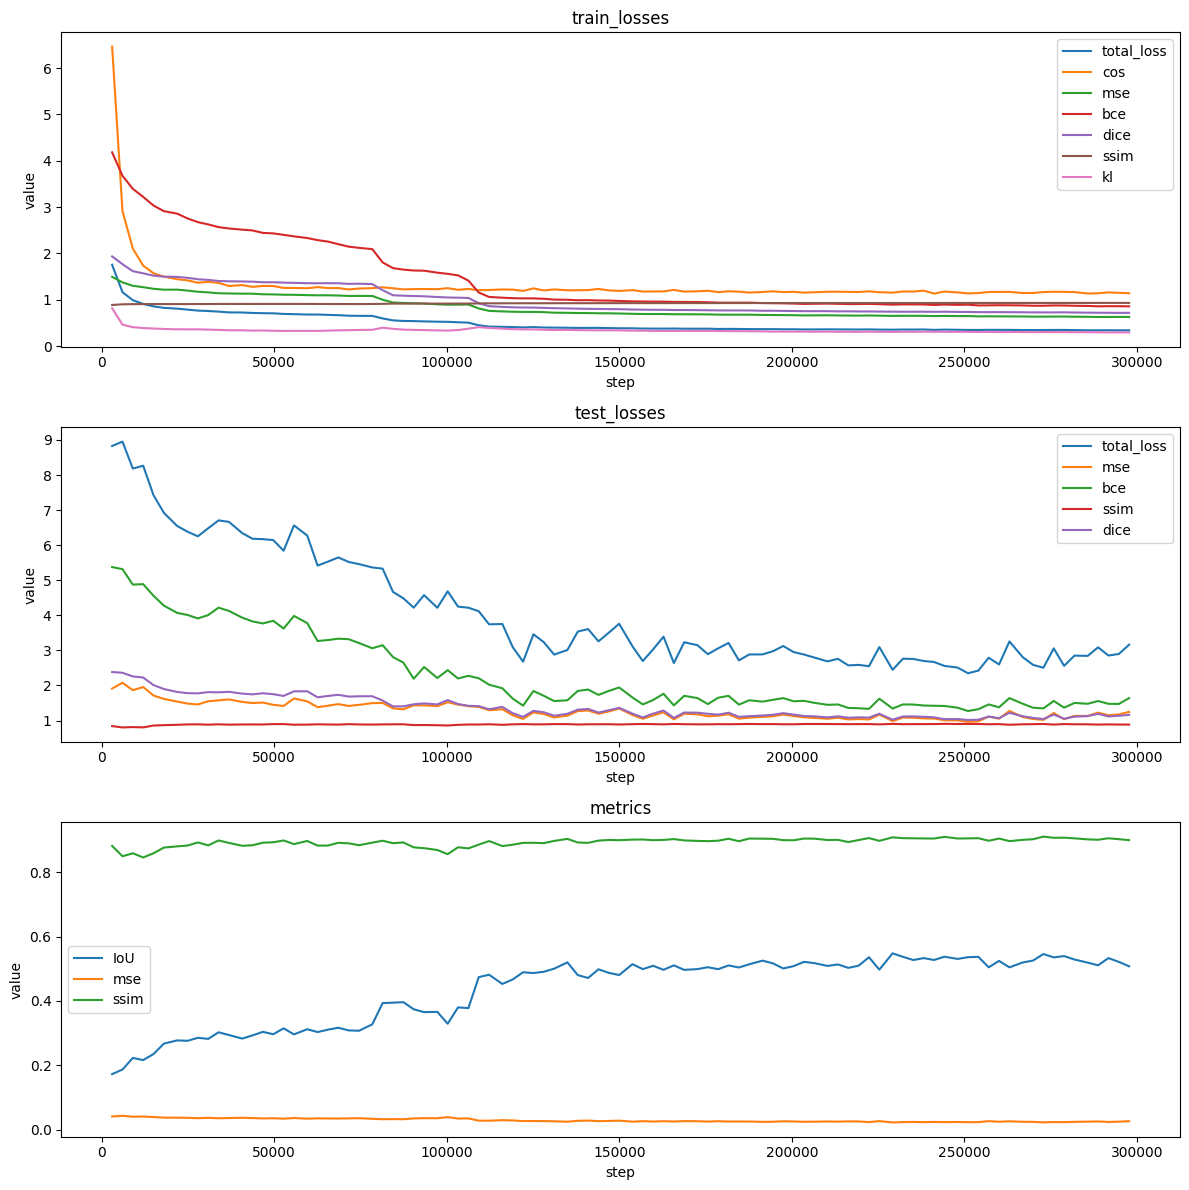

In [5]:
fig, axs = plt.subplots(3, 1, figsize=(12, 12))

# 第一張圖：train_losses
axs[0].plot([x[0] for x in train_losses], [x[1] for x in train_losses], label="total_loss")
axs[0].plot([x[0] for x in train_losses], [x[2] for x in train_losses], label="cos")
axs[0].plot([x[0] for x in train_losses], [x[3] for x in train_losses], label="mse")
axs[0].plot([x[0] for x in train_losses], [x[4] for x in train_losses], label="bce")
axs[0].plot([x[0] for x in train_losses], [x[5] for x in train_losses], label="dice")
axs[0].plot([x[0] for x in train_losses], [x[6] for x in train_losses], label="ssim")
axs[0].plot([x[0] for x in train_losses], [x[7] for x in train_losses], label="kl")
axs[0].legend()
axs[0].set_xlabel("step")
axs[0].set_ylabel("value")
axs[0].set_title("train_losses")

# 第二張圖：test_losses
axs[1].plot([x[0] for x in test_losses], [x[1] for x in test_losses], label="total_loss")
axs[1].plot([x[0] for x in test_losses], [x[2] for x in test_losses], label="mse")
axs[1].plot([x[0] for x in test_losses], [x[3] for x in test_losses], label="bce")
axs[1].plot([x[0] for x in test_losses], [x[4] for x in test_losses], label="ssim")
axs[1].plot([x[0] for x in test_losses], [x[5] for x in test_losses], label="dice")
axs[1].legend()
axs[1].set_xlabel("step")
axs[1].set_ylabel("value")
axs[1].set_title("test_losses")

# 第三張圖：metrics
axs[2].plot([x[0] for x in metrices], [x[1] for x in metrices], label="IoU")
axs[2].plot([x[0] for x in metrices], [x[2] for x in metrices], label="mse")
axs[2].plot([x[0] for x in metrices], [x[3] for x in metrices], label="ssim")
axs[2].legend()
axs[2].set_xlabel("step")
axs[2].set_ylabel("value")
axs[2].set_title("metrics")

# 調整子圖之間的間距
plt.tight_layout()

# 顯示合併圖
fig.savefig("A3_313832008_簡蔚驊.png")
plt.show()